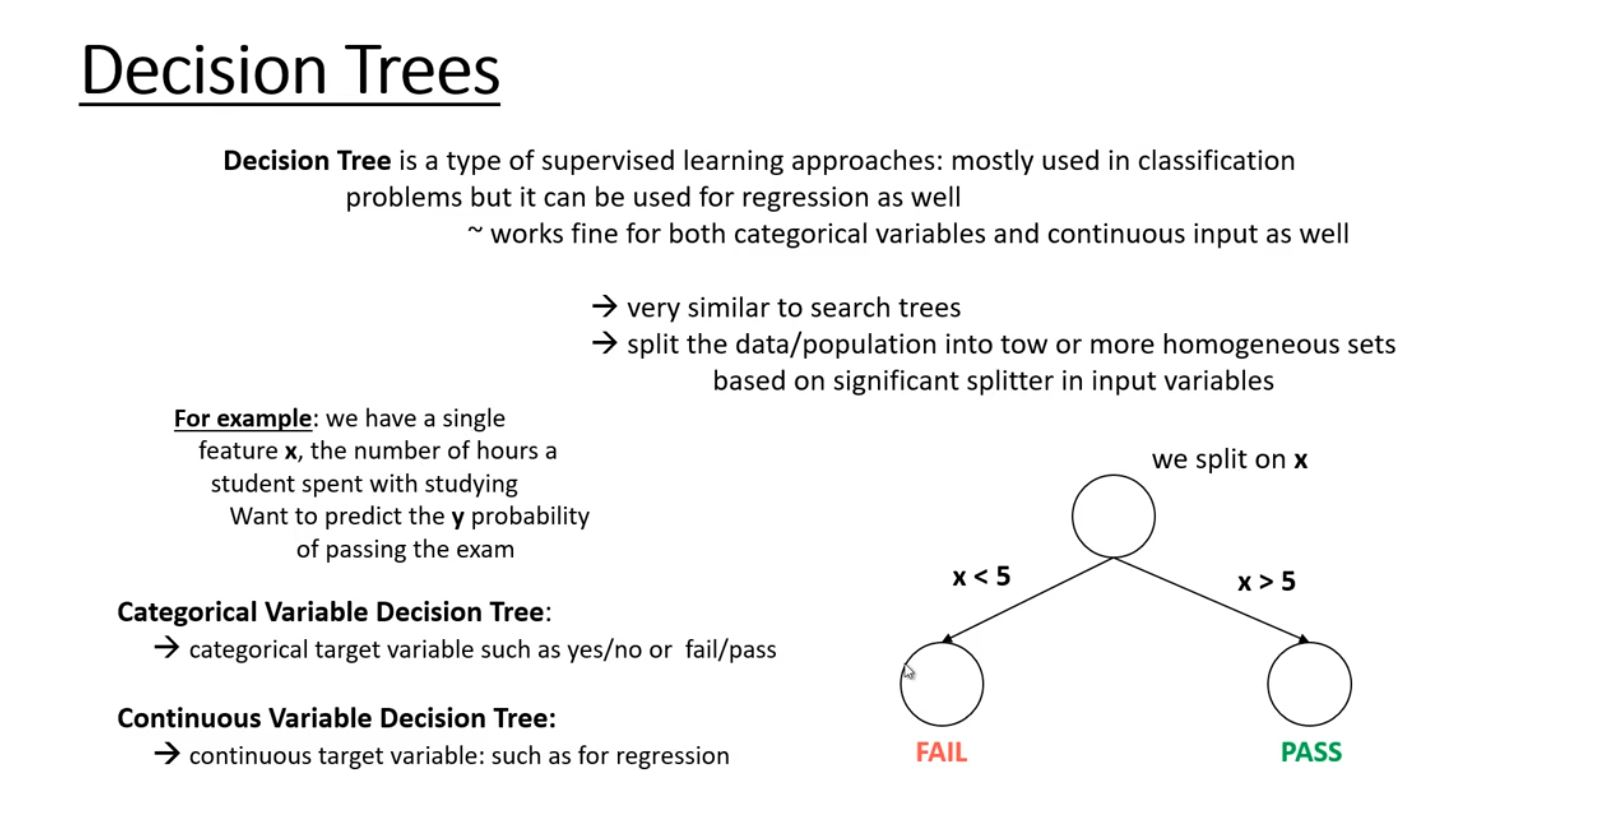


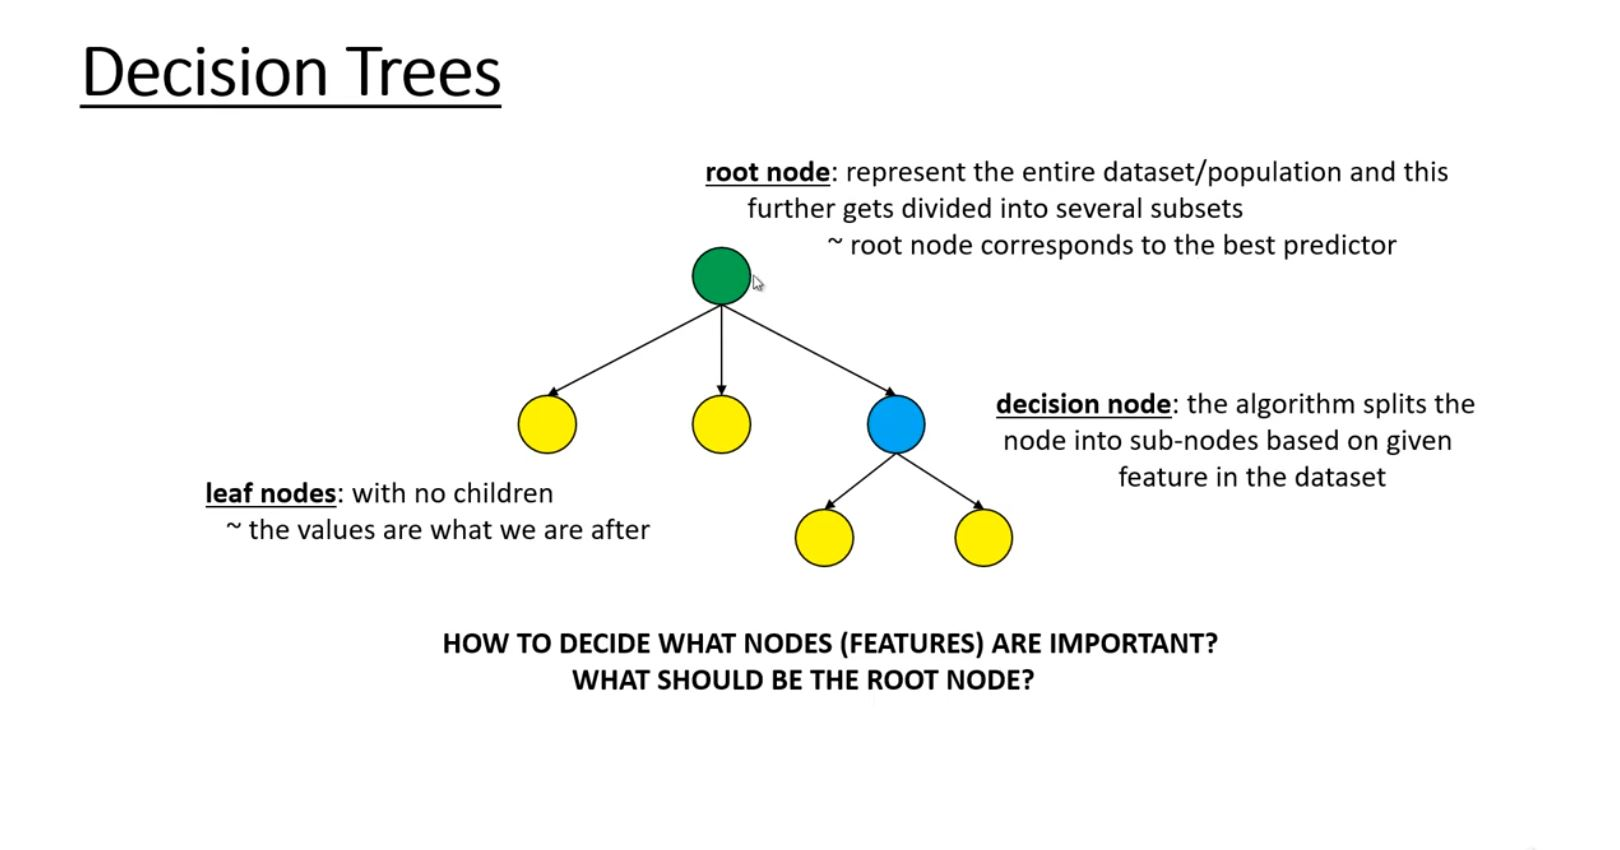

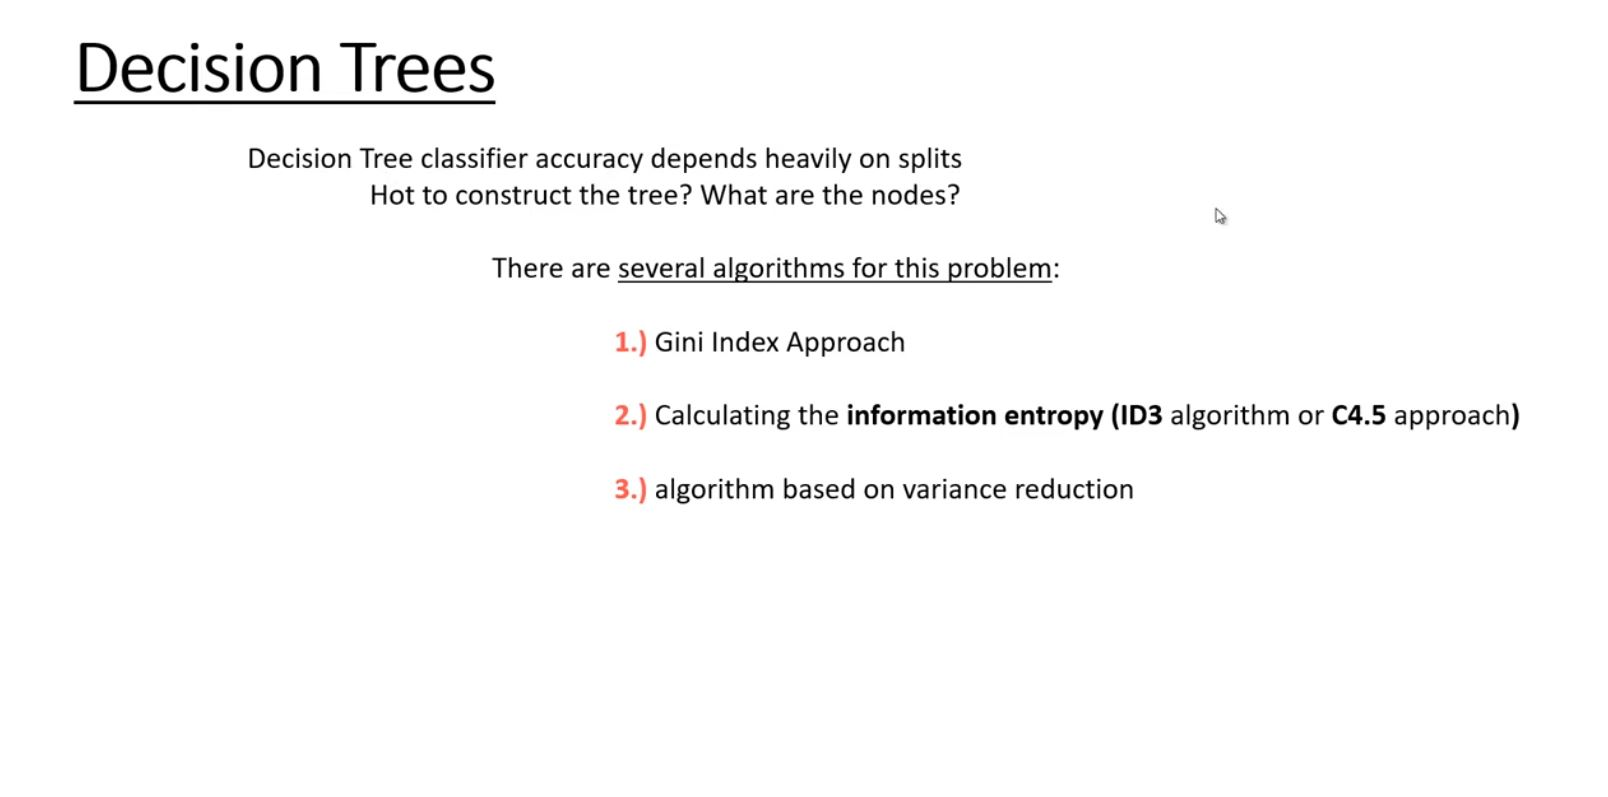

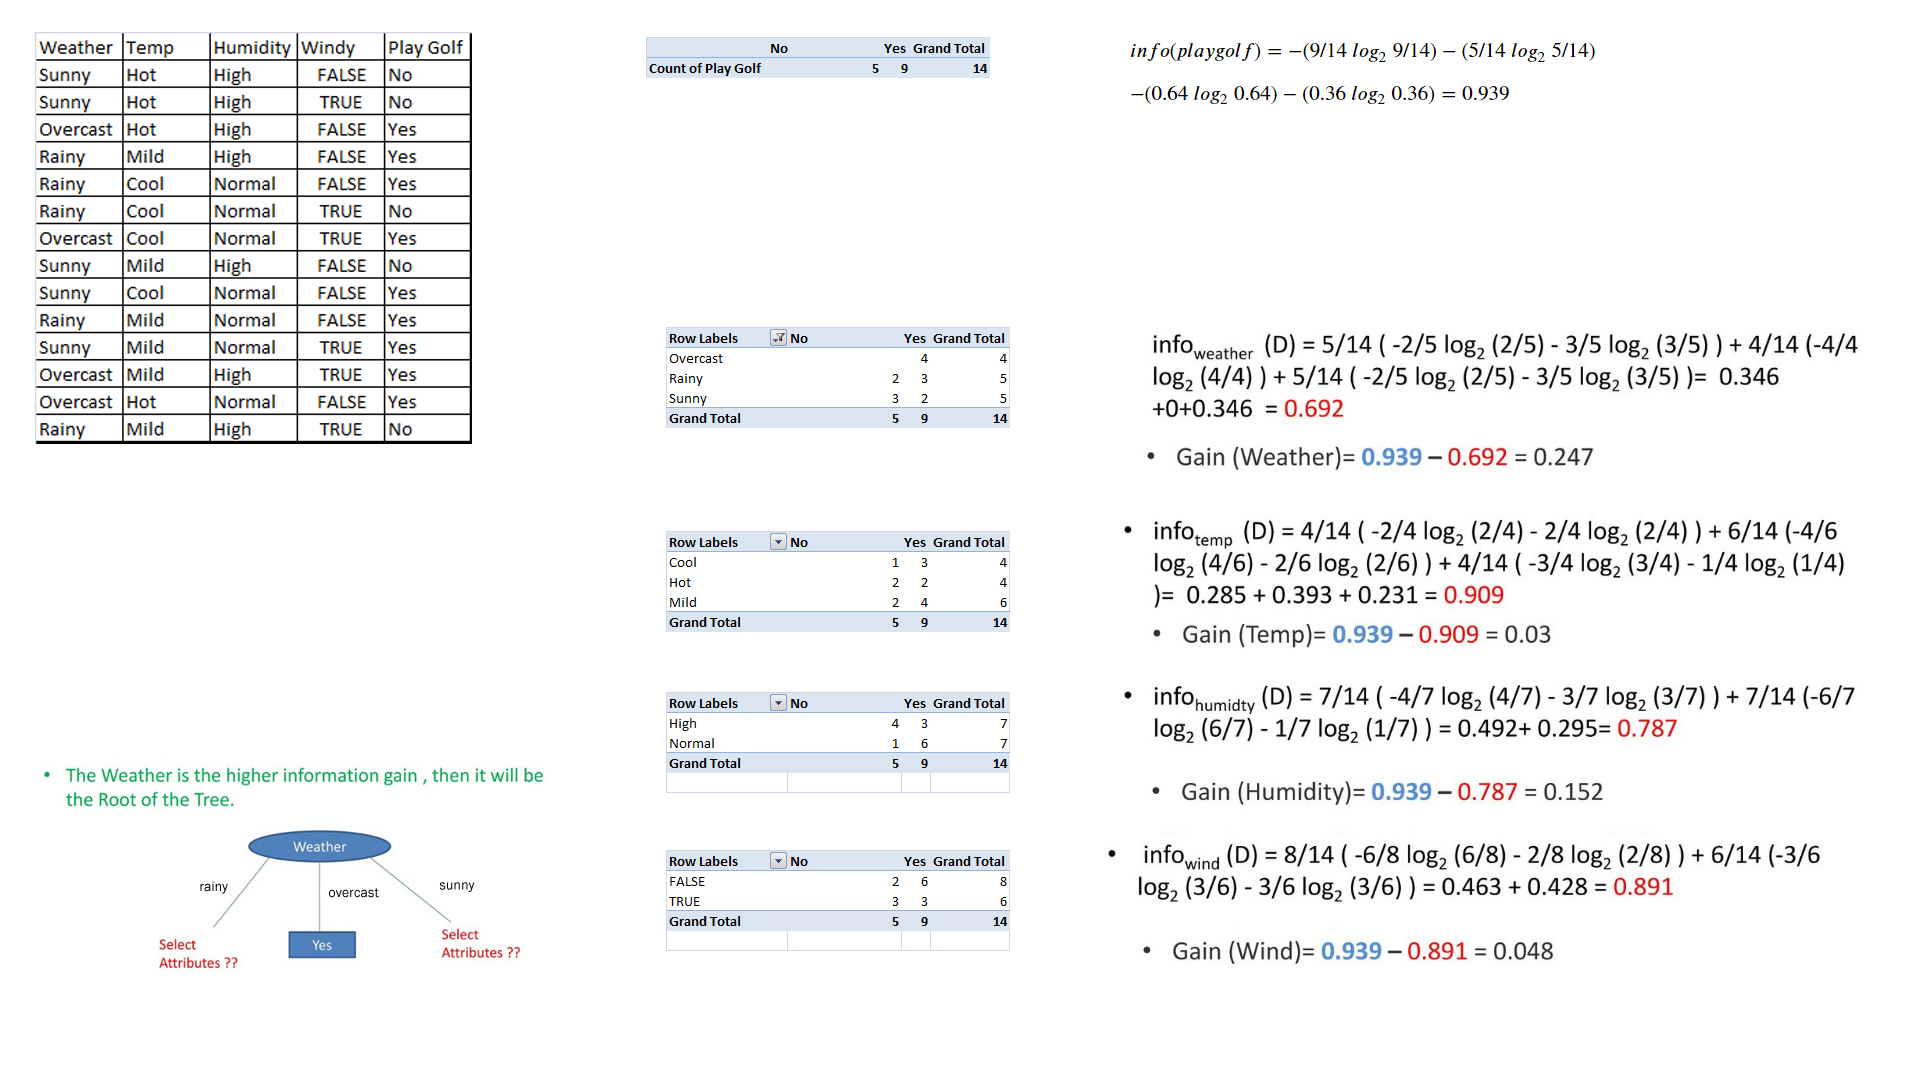

# LEFT BRANCH
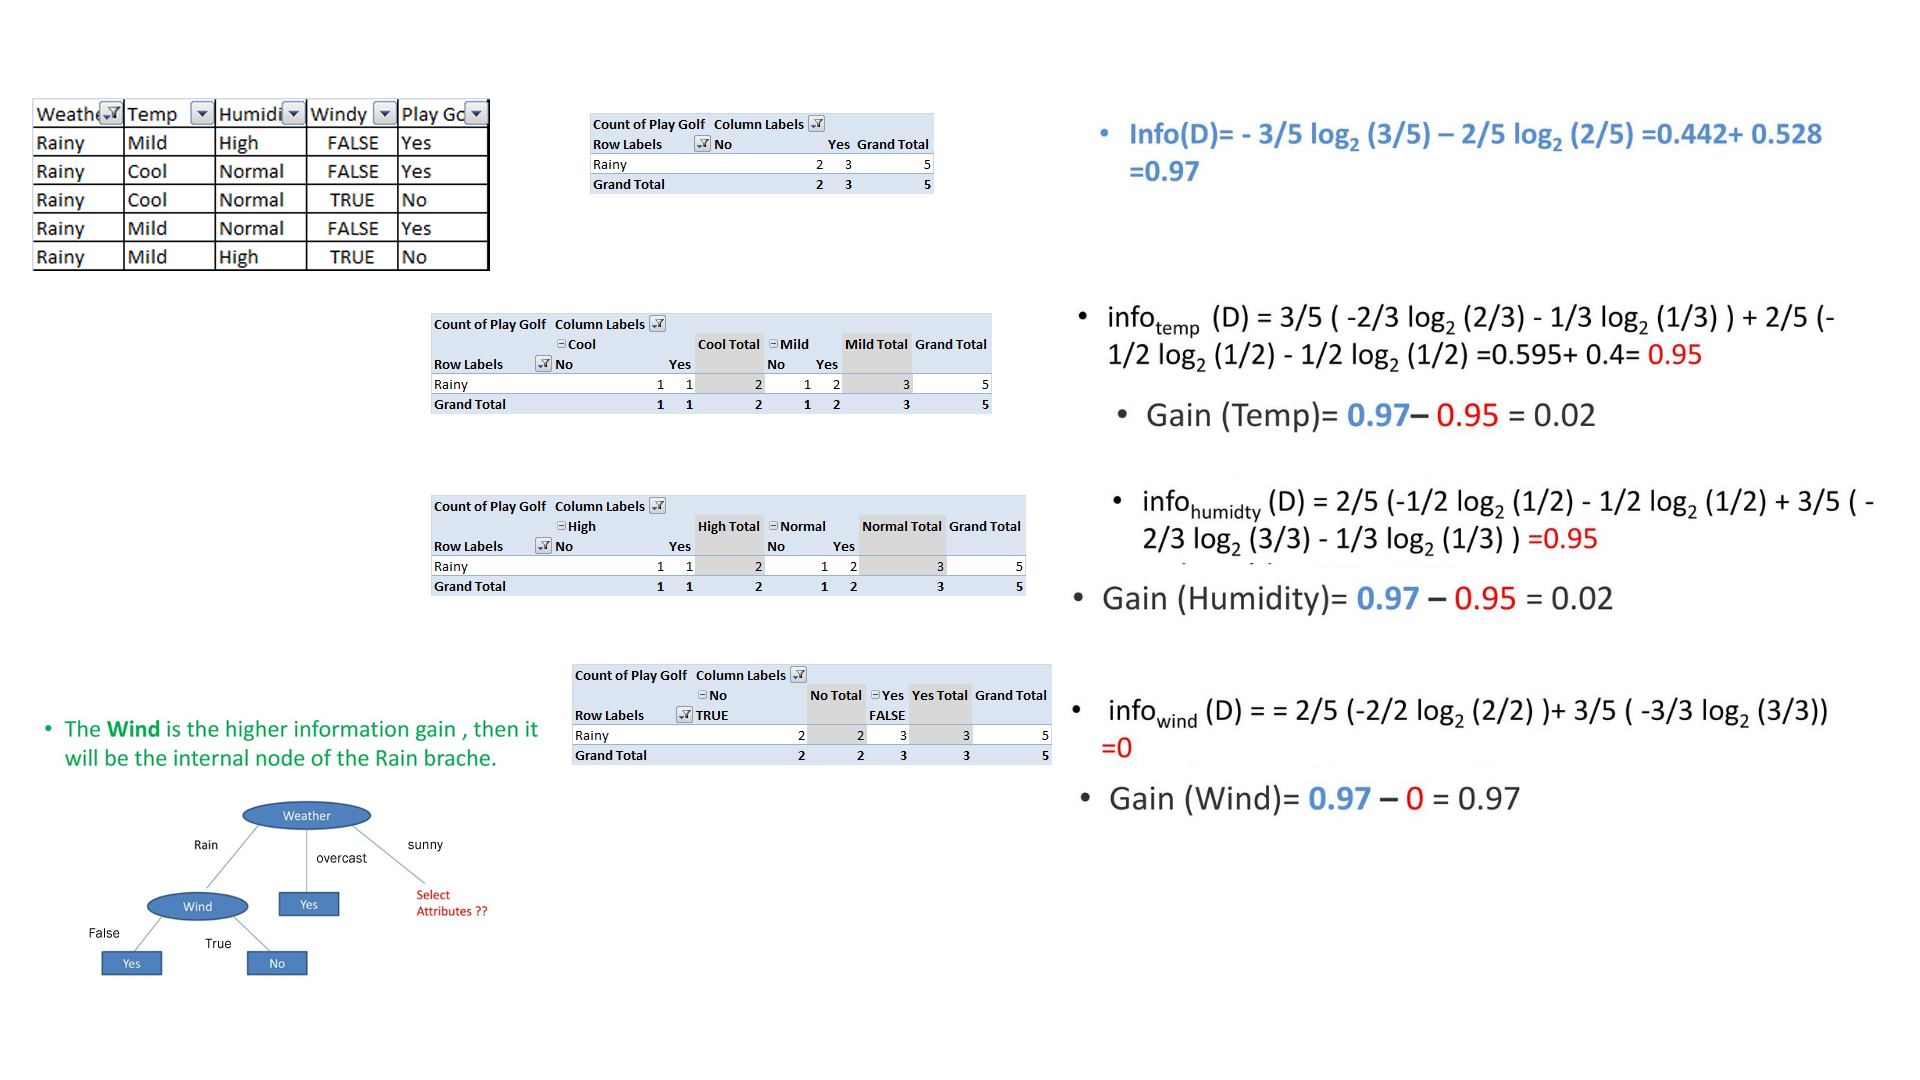

# RIGHT BRANCH
 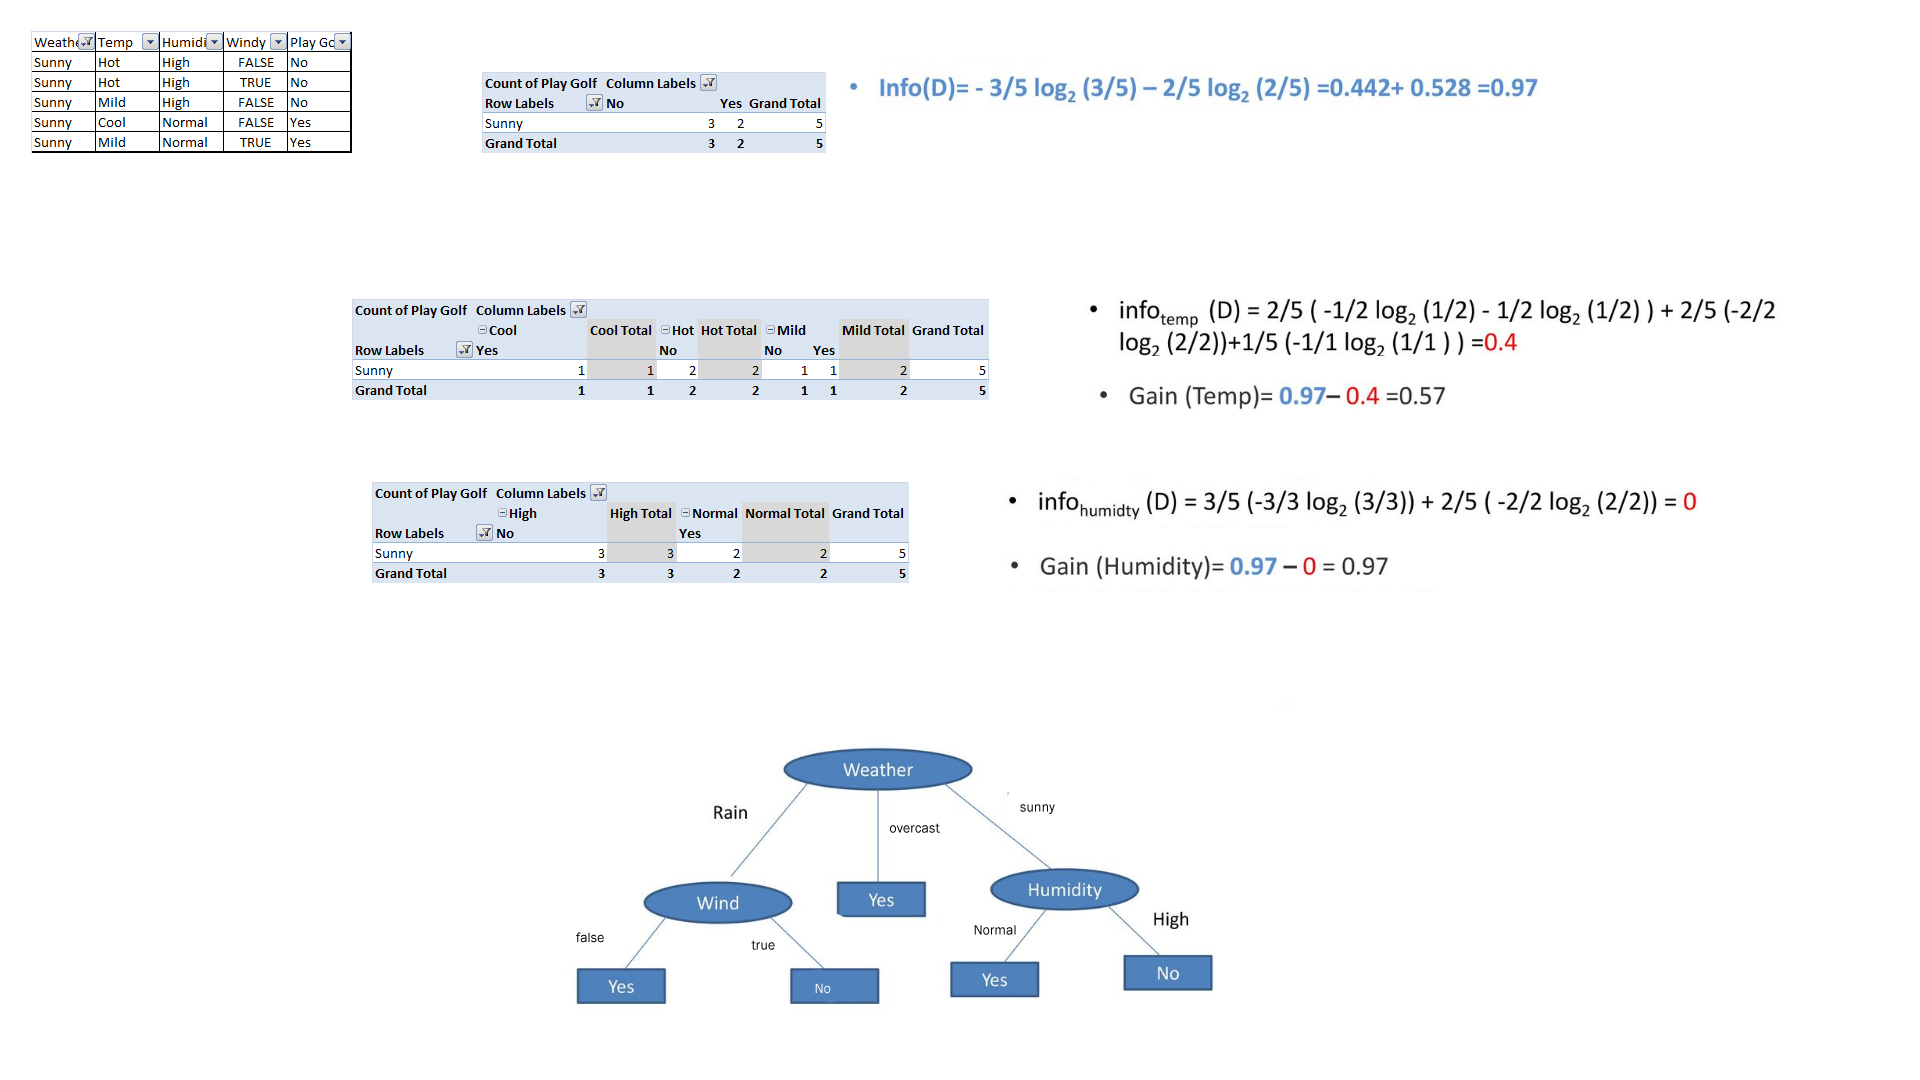

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# we'll load up the iris dataset
iris = load_iris()

# split the dataset into X and y values to prepare for the train/test split
X = iris.data  
y = iris.target

# now we get the train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)  

In [3]:
# now we can create an instance of the decision classifier
cl_tree = tree.DecisionTreeClassifier()

# train our decision tree (tree induction + pruning)
cl_tree = cl_tree.fit(X_train, y_train)

In [4]:
predicts = cl_tree.predict(X_test)

In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Accuracy score',accuracy_score(y_test,predicts))
print('\n')
print('confusion matrix',confusion_matrix(y_test,predicts))
print('\n')
print(classification_report(y_test,predicts))

Accuracy score 1.0


confusion matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Understanding Classification report

### support :
- total no of samples ineach classes

### Accuracy : accuracy is just the percentage of predictions that were made correctly


![](https://miro.medium.com/max/700/1*CNfkZN41axVggzq_0yqEYw.png)
![](https://miro.medium.com/max/700/1*sluS7bgqYOjd4835VegbJw.png)

- when there is balanced data set use accuracy
If there were 1,000 sample ppl , 500 of covid , 500 of not-covid, and the model only classified 5 of the covid ppl correctly, 500/500 of the non covid ppl correctly 

5+500/5+500+495+0= 0.5

### Precision:

![](https://miro.medium.com/max/700/1*x16UX1WoAOX4g3EVG8XQmQ.png)

- What proportion of positive identifications was actually correct?

- A model that produces no false positives has a precision of 1.0.

- If there were 1,000 sample ppl , 500 of covid , 500 of not-covid, and the model only classified 5 of the covid ppl correctly, and called everything else not-covid ppl, that would be perfect, 1.0 precision (even though 495 of the covid ppl were missed by the classifier).
- refer to the precision score when you want to be confident in the YESes the model gives you.  


## Recall:

![](https://miro.medium.com/max/700/1*rMQvdpGIDSzsmDI7P0gHAg.png)
- What proportion of actual positives was identified correctly?
- A model that produces no false negatives has a recall of 1.0.
- How good is the model at catching YESes? 
- If there were 1,000 sample ppl , 500 of covid , 500 of not-covid, and the model only classified 5 of the covid ppl correctly, and called everything else not-covid ppl, that would be perfect, what fraction of them did the model get right and call covid ppl? 5/5+495 =5/500 =0.01 


## f1 score

![](https://miro.medium.com/max/700/1*yEtZmFiR-sp0lQurEi8UfQ.png)


- when there is imbalanced data set use f1  score
- If either recall or precision is 0, F1 score will reflect that an also be 0
- An example: 5 covid ppl, 995 non covid ppl in traning set(imbalanced). We get a classifier running, and it correctly gets one of those  covid ppl classified, but calls everyone else  as non covid ppl. That means there are 4 incorrectly classified non covid ppl . Recall is 0.2 (pretty bad) and precision is 1.0 (perfect), but accuracy, clocking in at 0.999, isn’t reflecting how badly the model did at catching those  covid ppl; F1 score, equal to 0.33, is capturing the poor balance between recall and precision.

# Macro Average & Weigted Average 

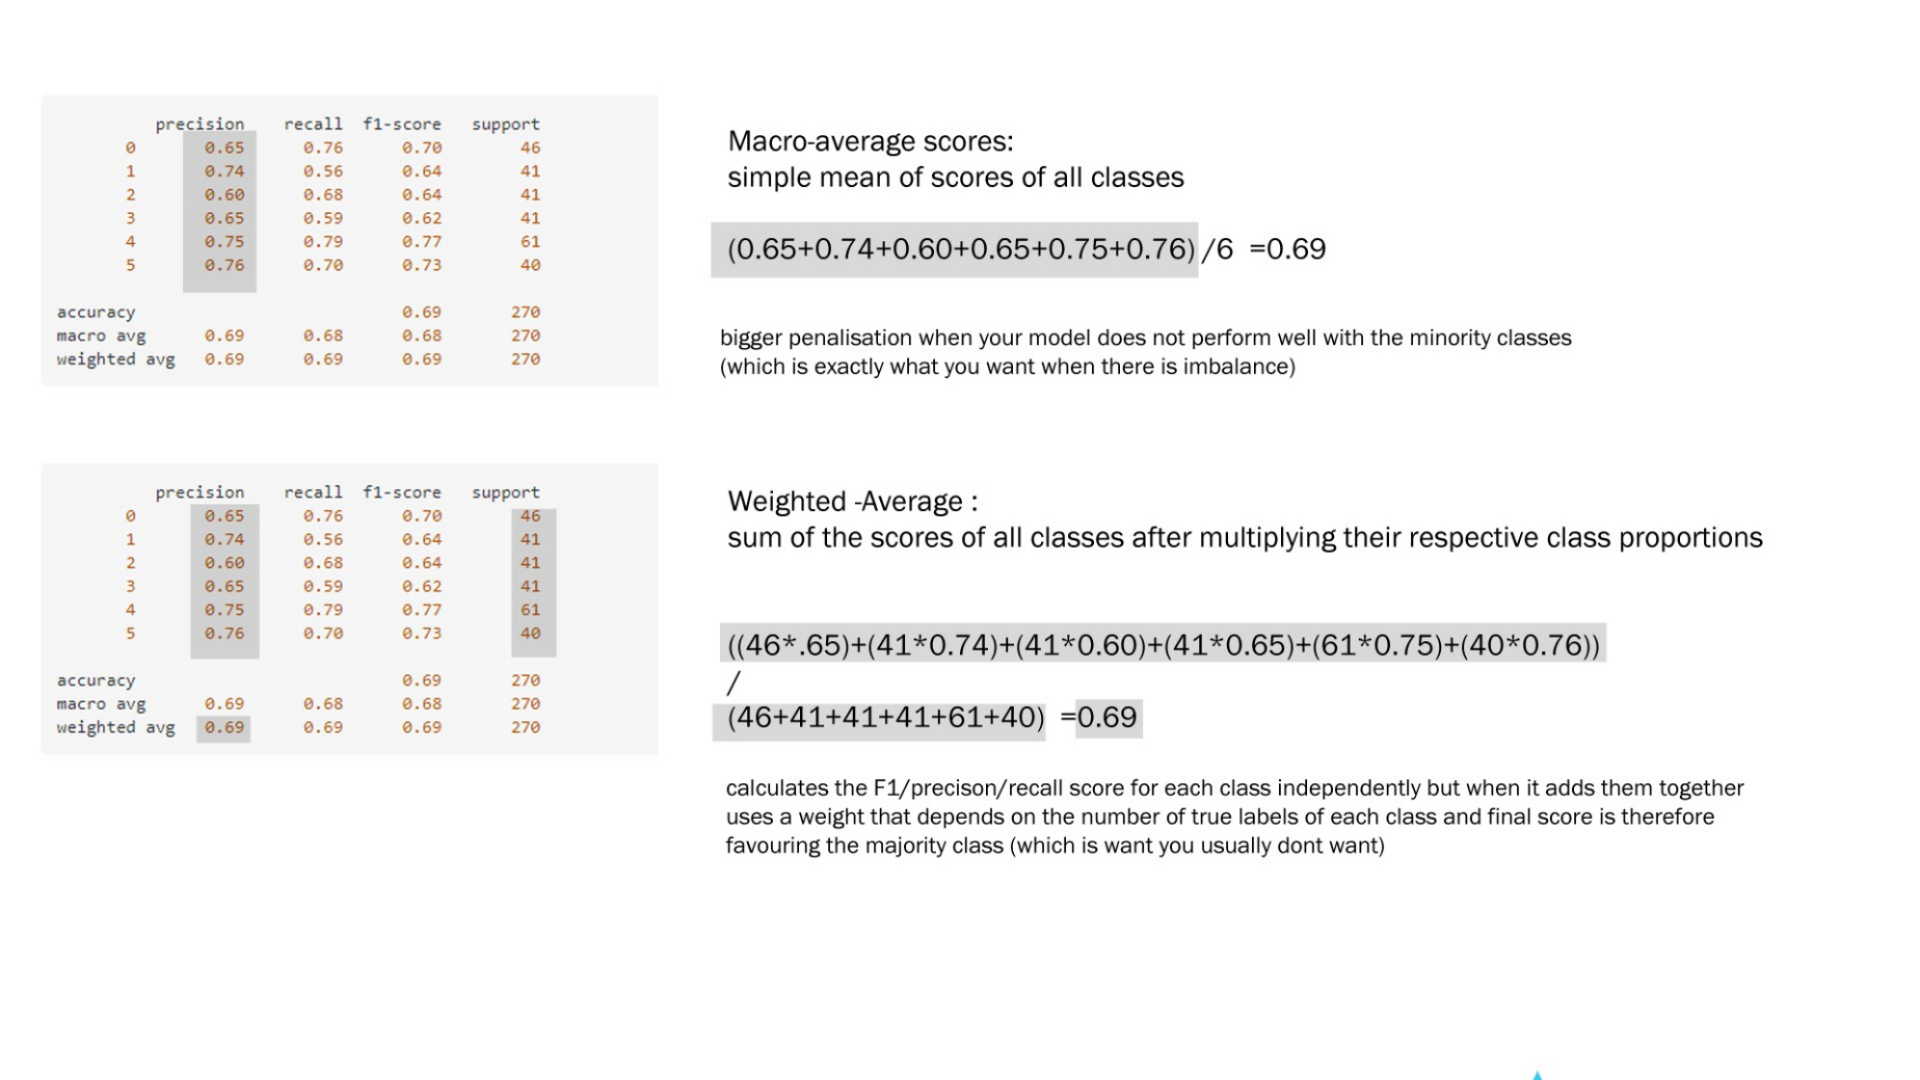


# Imbalanced dataset  : F1 score / Macro Average

# Balanced dataset  : Accurcy /Weighted Average

In [6]:
# export the decision tree in graphviz format and then let's print it out
dot_data = tree.export_graphviz(cl_tree, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True,
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris")
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [7]:
#How graphviz works sample
sample_tree=graphviz.Digraph()
sample_tree.node('A','Fruits')
sample_tree.node('B','Apple')
sample_tree.node('C','Orange')
sample_tree.edges(['AB','AC'])
sample_tree.render('frutis')
sample_tree

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'frutis'], make sure the Graphviz executables are on your systems' PATH

In [8]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<petal width (cm) &le; 0.8<br/>gini = 0.667<br/>samples = 120<br/>value = [40, 41, 39]<br/>class = versicolor>, fillcolor="#fdfffd"] ;\n1 [label=<gini = 0.0<br/>samples = 40<br/>value = [40, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal length (cm) &le; 4.75<br/>gini = 0.5<br/>samples = 80<br/>value = [0, 41, 39]<br/>class = versicolor>, fillcolor="#f5fef9"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal width (cm) &le; 1.65<br/>gini = 0.053<br/>samples = 37<br/>value = [0, 36, 1]<br/>class = versicolor>, fillcolor="#3ee684"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 36<br/>value = [0, 36, 0]<br/>class = versicolor>, fillcolor="#39e581"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]<br/>class = virginic

$ info(playgolf) = -(9/14 \space log_2  \space 9/14 )-( 5/14 \space log_2 \space 5/14) $

$ -(0.64 \space log_2  \space 0.64 )-( 0.36 \space log_2 \space  0.36 ) = 0.939$